In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
column_names = ["class","age","menopause","tumor-size","inv-nodes","node","deg","breast","breast-quad","irradiat"]

In [5]:
df = pd.read_csv('breast-cancer.csv', names= column_names)

In [6]:
df

,class,age,menopause,tumor-size,inv-nodes,node,deg,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node         286 non-null    object
 6   deg          286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
missing_counts = df.isnull().sum()

In [9]:
missing_counts

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node           0
deg            0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [10]:
df.describe ()

,deg
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [11]:
column_with_qm = df.columns[df.isin(["?"]).any()]

In [12]:
column_with_qm

Index(['node', 'breast-quad'], dtype='object')

In [13]:
for col in column_with_qm:
    mode = df[col].mode()[0]
    df.loc[df[col]=="?",col] = mode

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
column_with_qm

Index(['node', 'breast-quad'], dtype='object')

In [17]:
df['node'] = le.fit_transform(df['node'])

In [18]:
df['breast-quad'] = le.fit_transform(df['breast-quad'])

In [19]:
df['menopause'] = le.fit_transform(df['menopause'])

In [20]:
df['breast'] = le.fit_transform(df['breast'])

In [21]:
df['irradiat'] = le.fit_transform(df['irradiat'])


In [22]:
df['tumor-size'] = le.fit_transform(df['tumor-size'])

In [23]:
df['inv-nodes'] = le.fit_transform(df['inv-nodes'])

In [24]:
df['irradiat'] = le.fit_transform(df['irradiat'])

In [25]:
df['class'] = le.fit_transform(df['class'])

In [26]:
df['age'] = le.fit_transform(df['age'])

In [27]:
df

,class,age,menopause,tumor-size,inv-nodes,node,deg,breast,breast-quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,2,0,2,0
282,1,1,2,3,0,0,3,0,2,1
283,1,4,0,3,0,0,1,1,2,0
284,1,2,0,5,4,0,3,0,1,0


## Data Visualization


<Axes: xlabel='age', ylabel='count'>

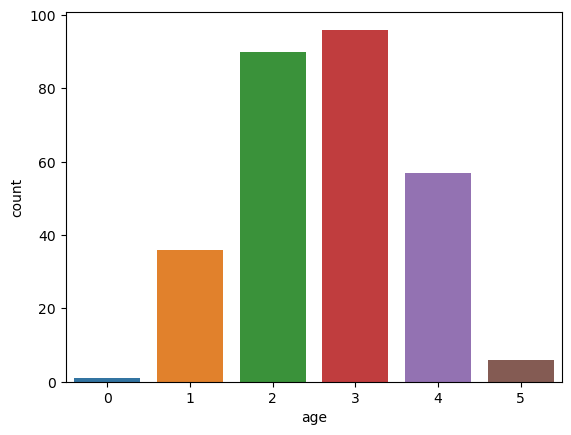

In [28]:
#count plot to check distribution of breast cancer in specific age groups
sns.countplot(x = 'age', data = df)

<Axes: xlabel='menopause', ylabel='count'>

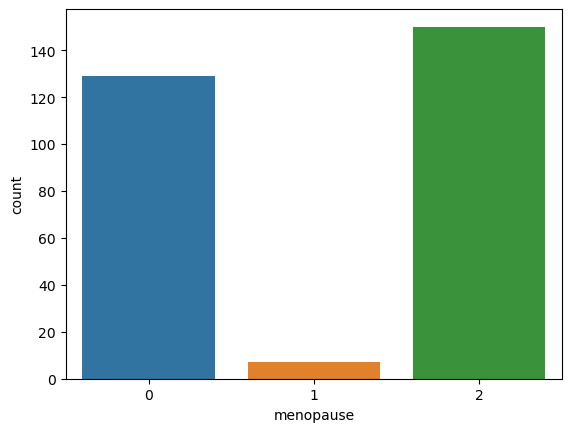

In [29]:
#countplot to count the number of breast cancer in menopause
sns.countplot(x = 'menopause', data = df)

<Axes: xlabel='tumor-size', ylabel='count'>

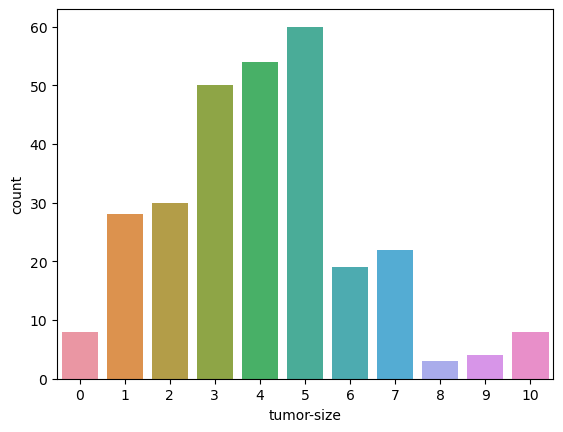

In [30]:
#countplot to count the number of breast cancer in specific tumour size
sns.countplot(x = 'tumor-size', data = df)

<Axes: xlabel='breast', ylabel='count'>

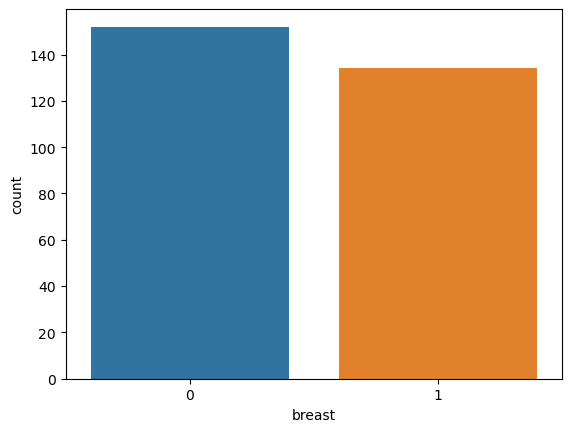

In [31]:
#countplot to identify the specific number with breast cancer in left and right breast respectively
sns.countplot(x = 'breast', data = df)

<Axes: xlabel='breast-quad', ylabel='count'>

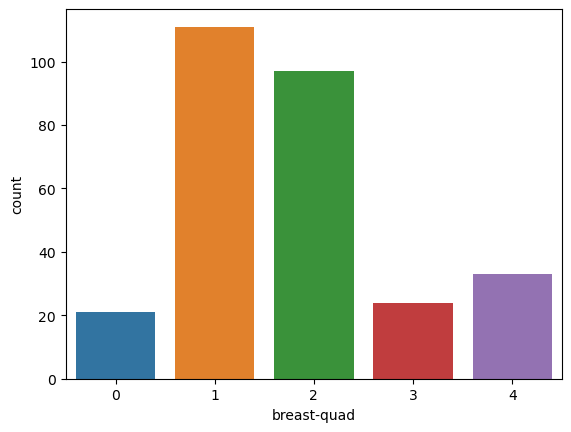

In [32]:
#countplot to identify the number of breast cancer in specific breast quadrant
sns.countplot(x = 'breast-quad', data = df)

In [33]:
# checking the distribution plot of all the columns
for column in df:
    print(column)

class
age
menopause
tumor-size
inv-nodes
node
deg
breast
breast-quad
irradiat


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

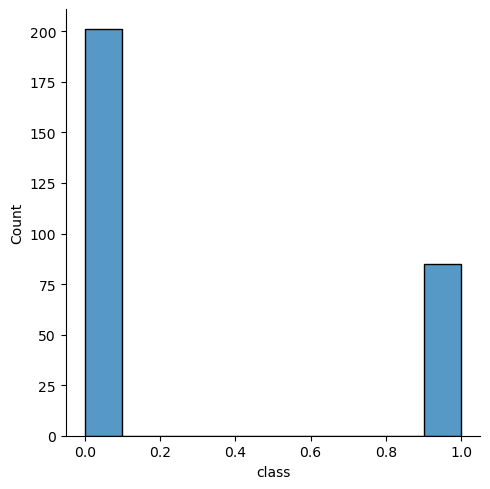

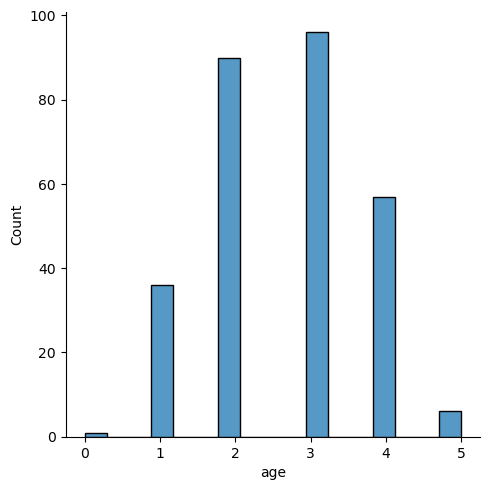

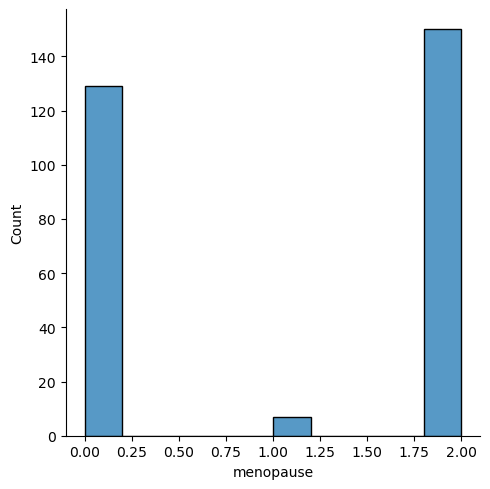

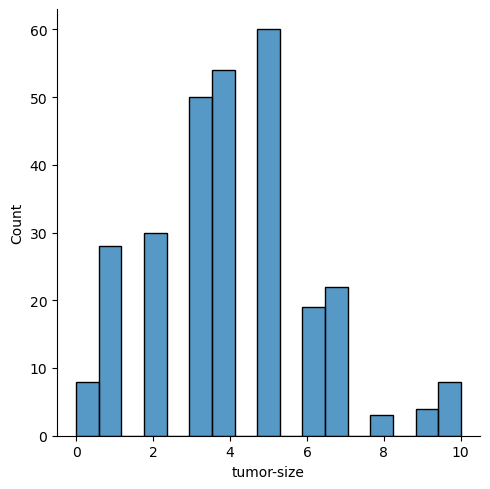

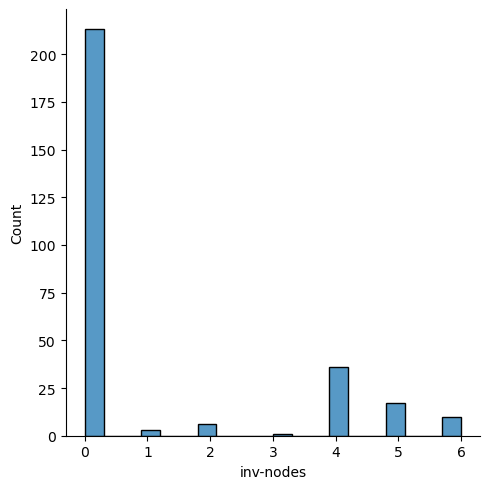

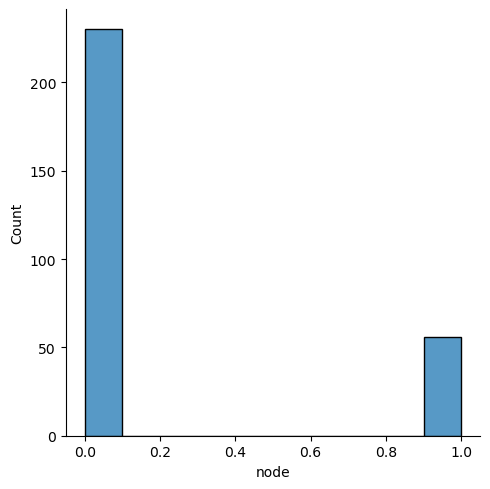

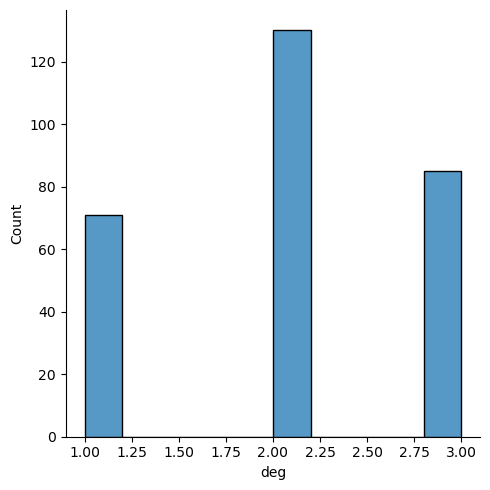

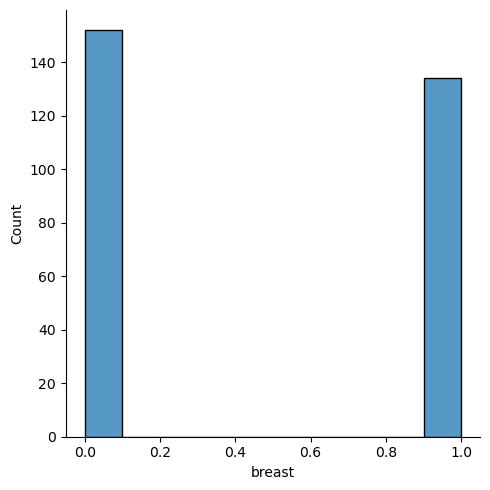

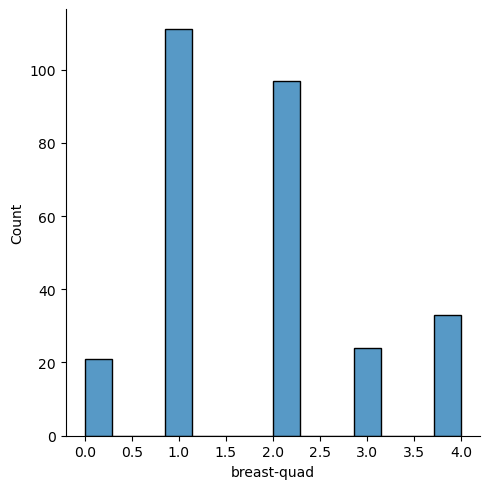

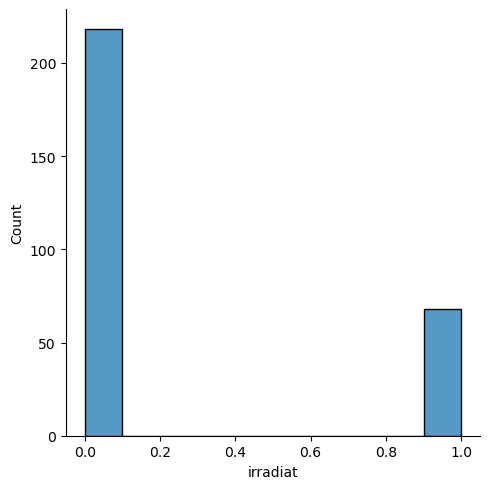

In [34]:
#creating for loop for getting distribution plot for all the column
for column in df:
    sns.displot(x =column, data = df)

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

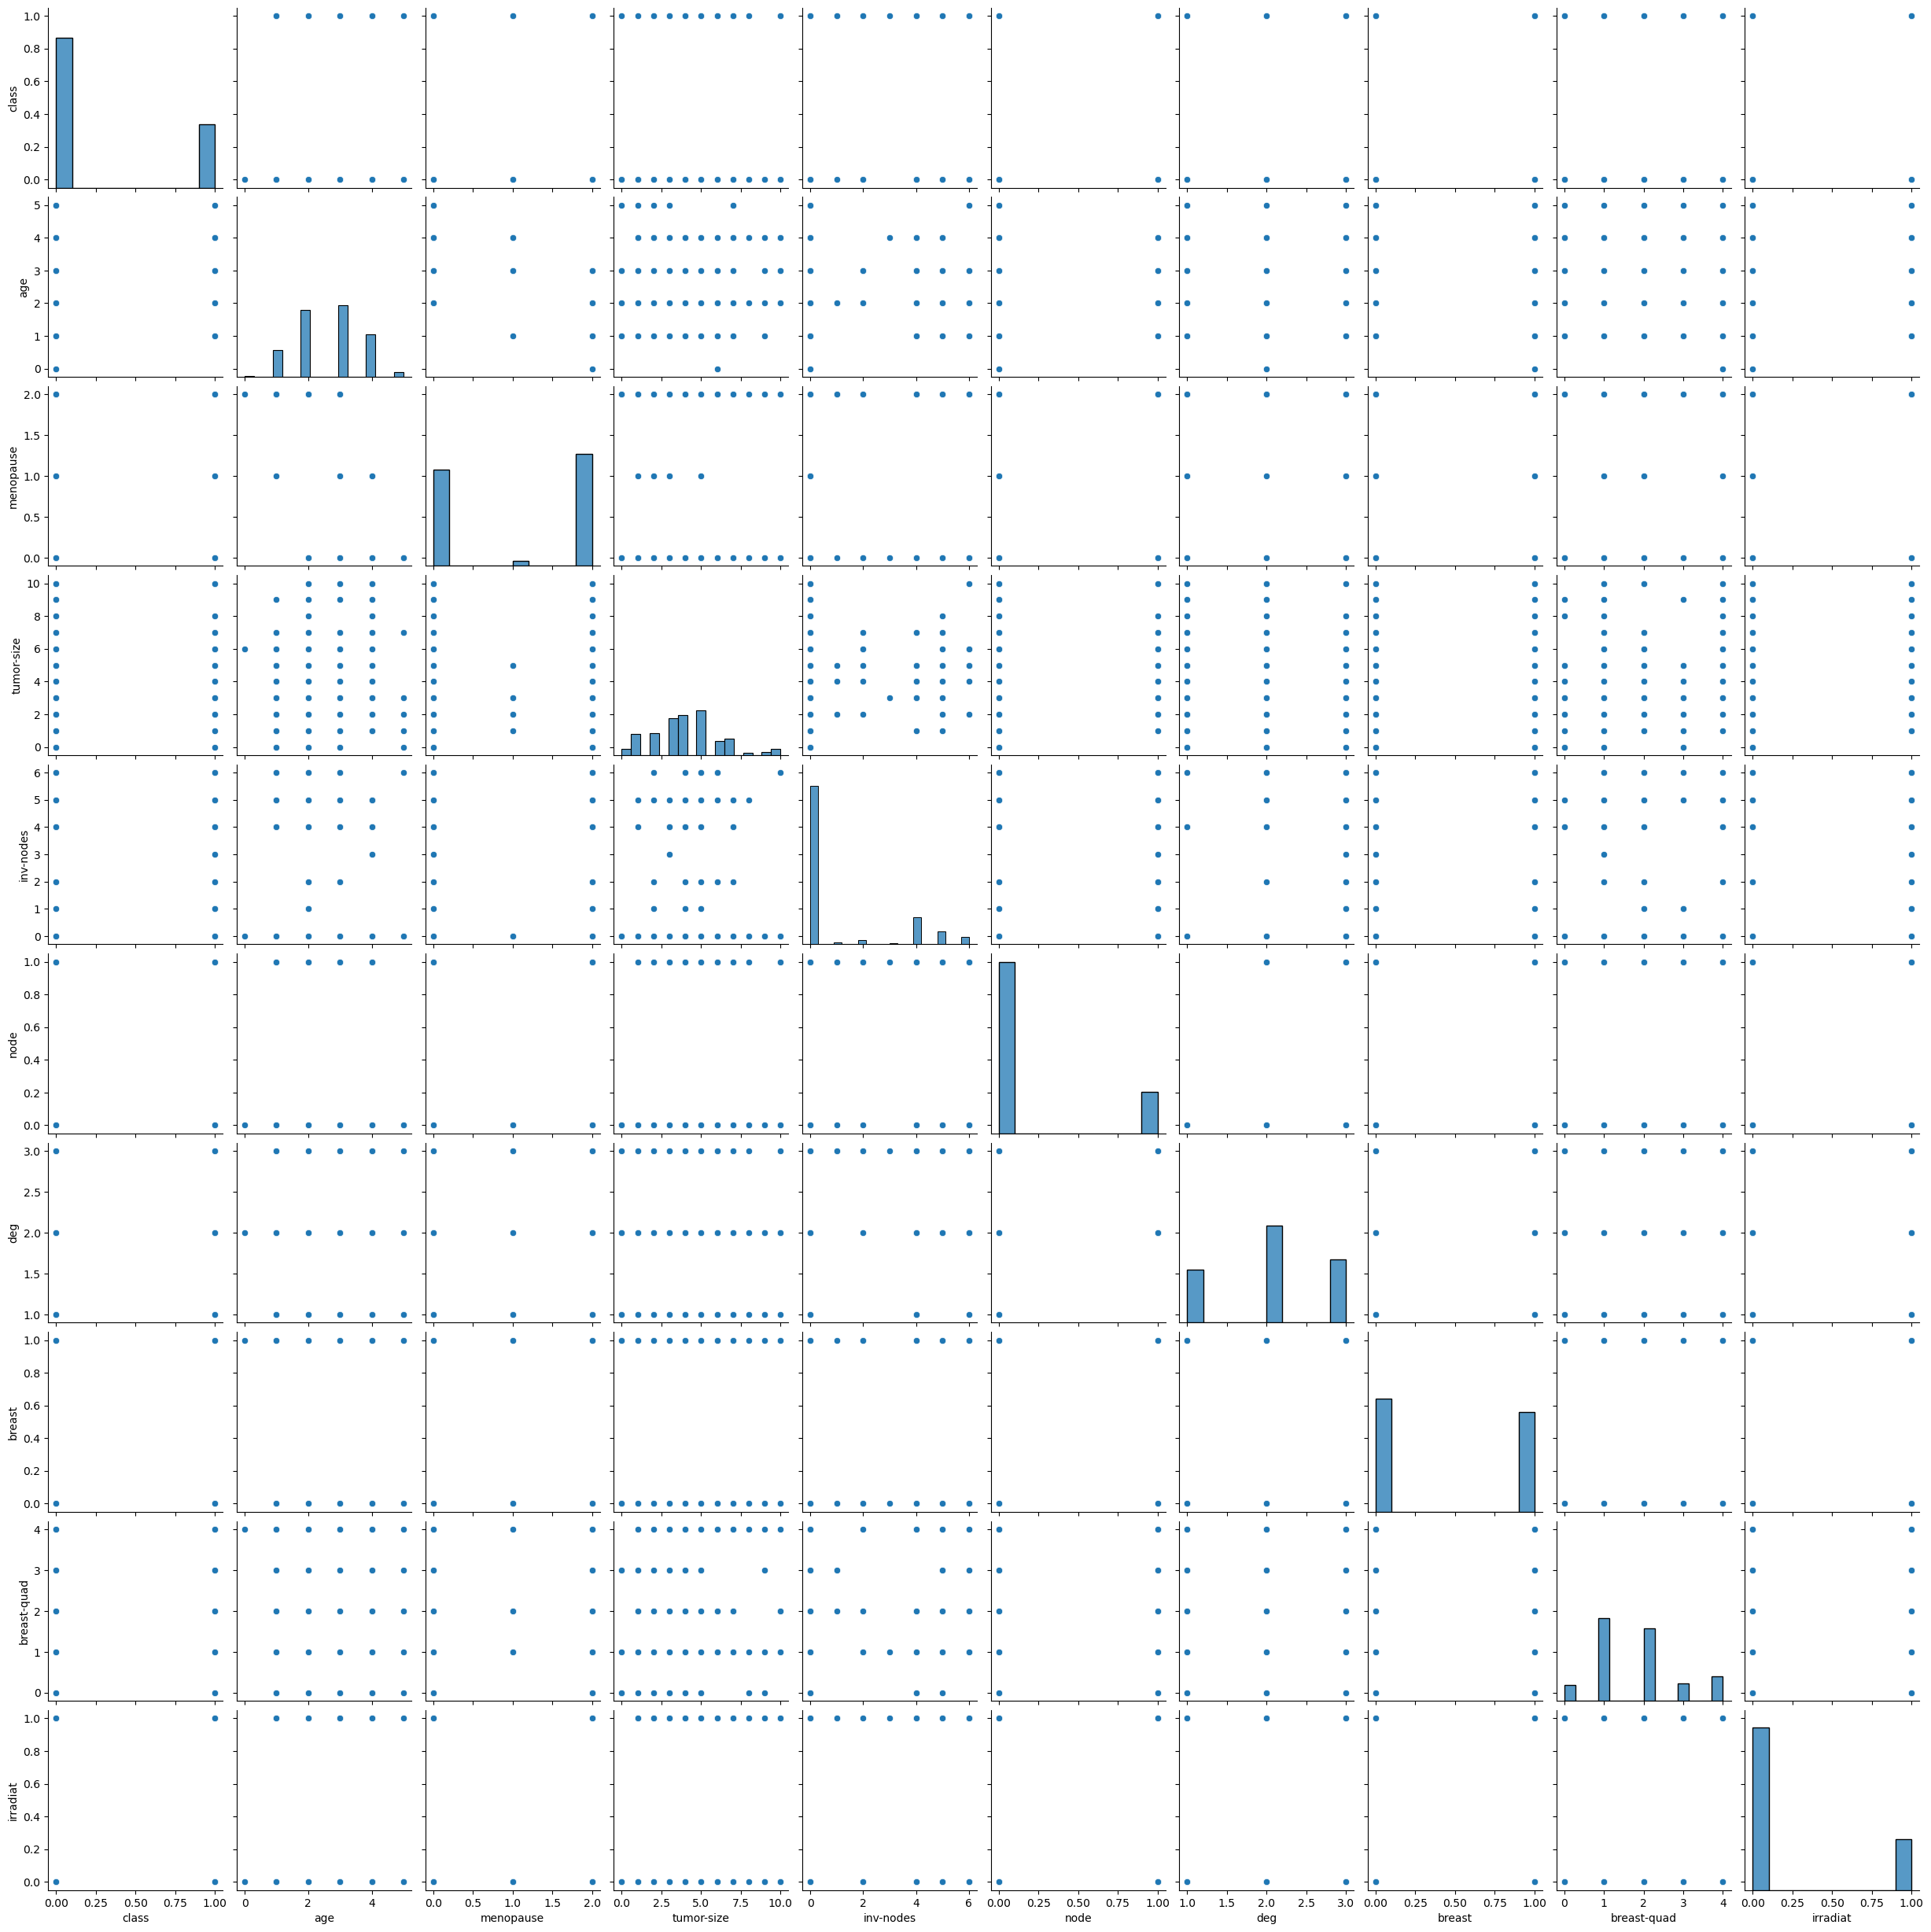

In [35]:
# creating a pair plot for the dataset
sns.pairplot(df)

In [36]:
correlation_matrix = df.corr()

<Axes: >

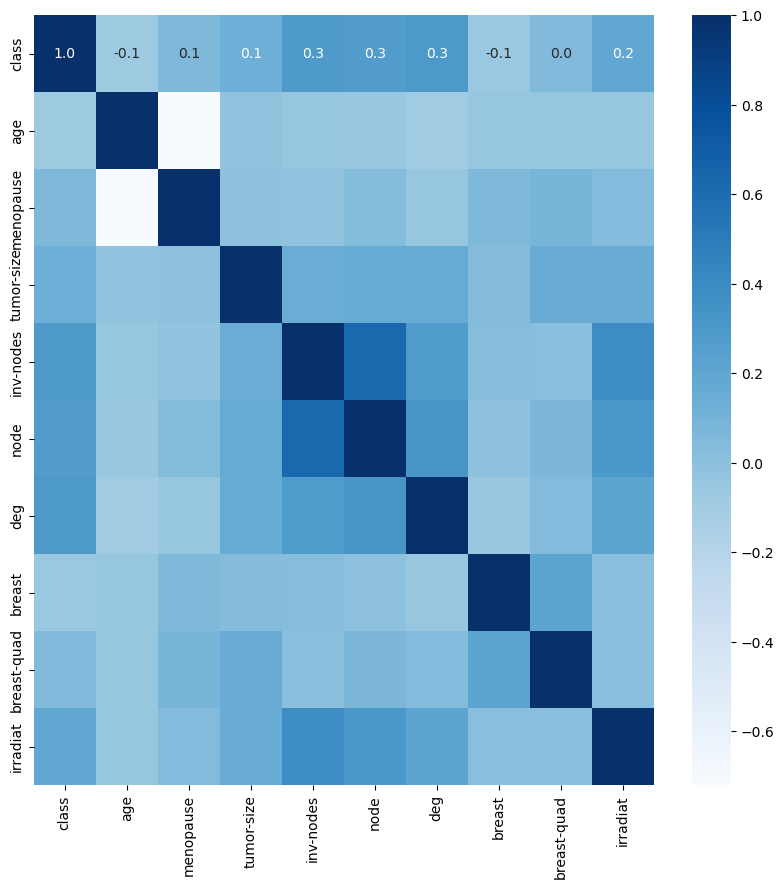

In [37]:
#constructing a heatmap for the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, cbar = True, fmt = '.1f', annot = True, cmap = 'Blues')

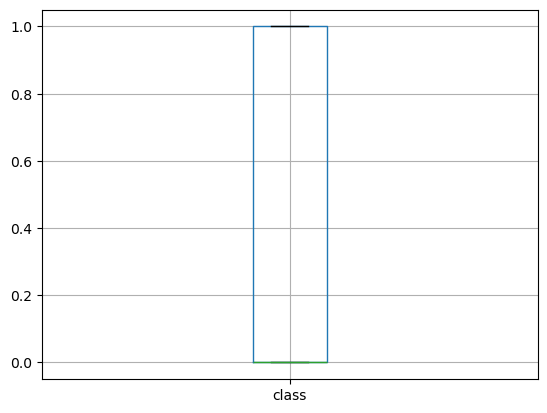

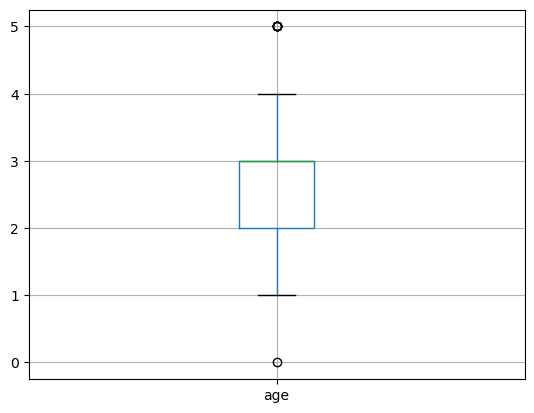

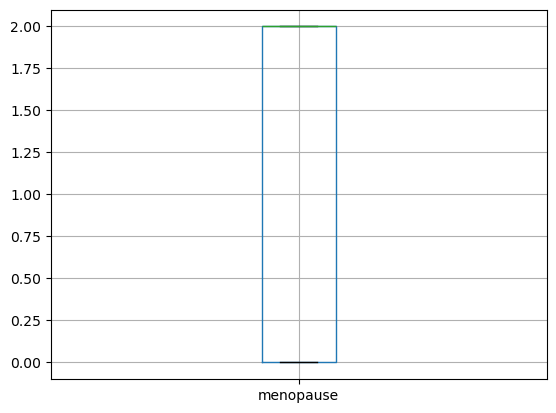

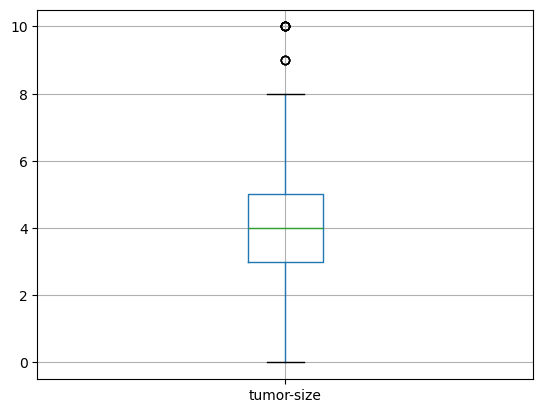

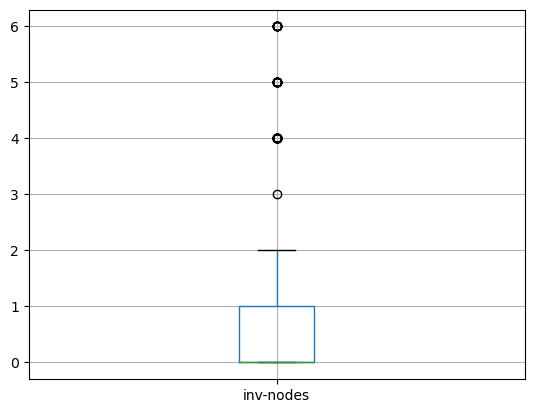

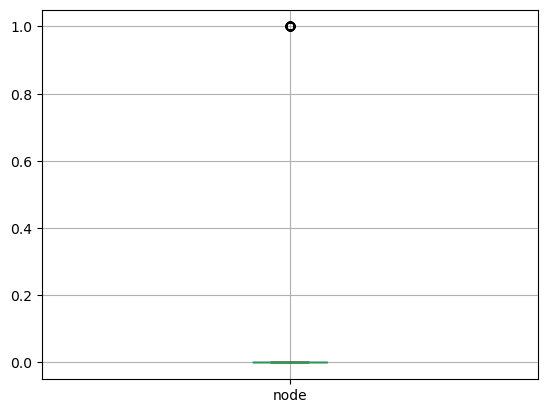

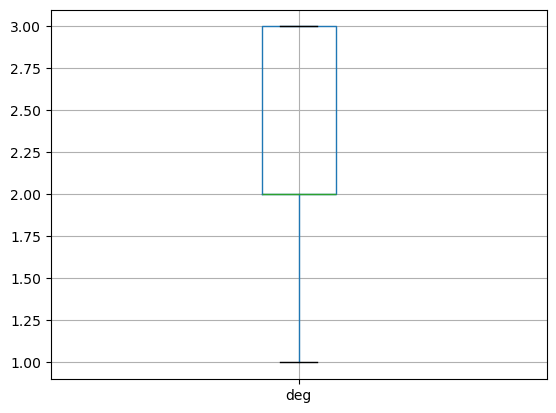

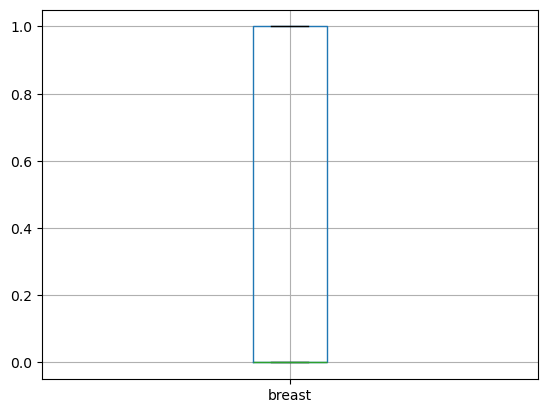

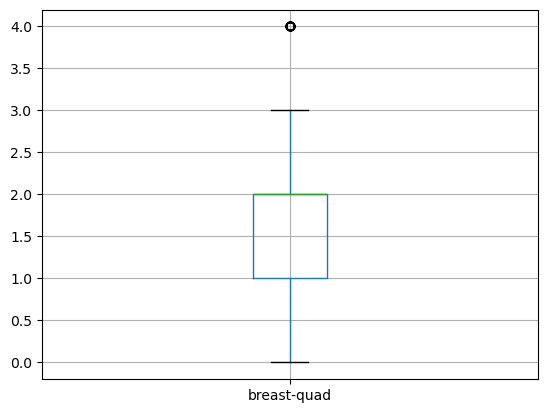

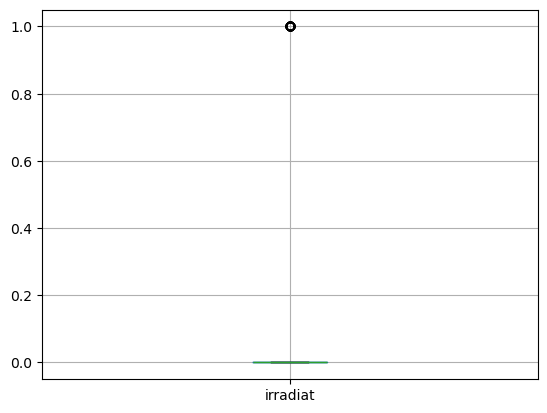

In [38]:
#boxplot for outliers detection in the datasest
for column in df:
    plt.figure()
    df.boxplot([column])

In [39]:
## XG BOOST

In [40]:
# Step 1: Install xgboost in the correct environment
# Using sys.executable to ensure installation in the active environment
# as directly installing xgboost was not working
import sys
!{sys.executable} -m pip install xgboost


In [41]:
# Step 3: Import the required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [42]:
print("Unique values in target column:", df['breast-quad'].unique())

Unique values in target column: [1 4 2 3 0]


In [43]:
# Preprocessing (Assuming data is already preprocessed and cleaned)
X = df.drop('breast-quad', axis=1)  # Features
y = df['breast-quad']  # Target variable



In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=42)

In [45]:
model = XGBClassifier()

In [46]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0 0]
 [0 1 0]
 [0 0 1]]


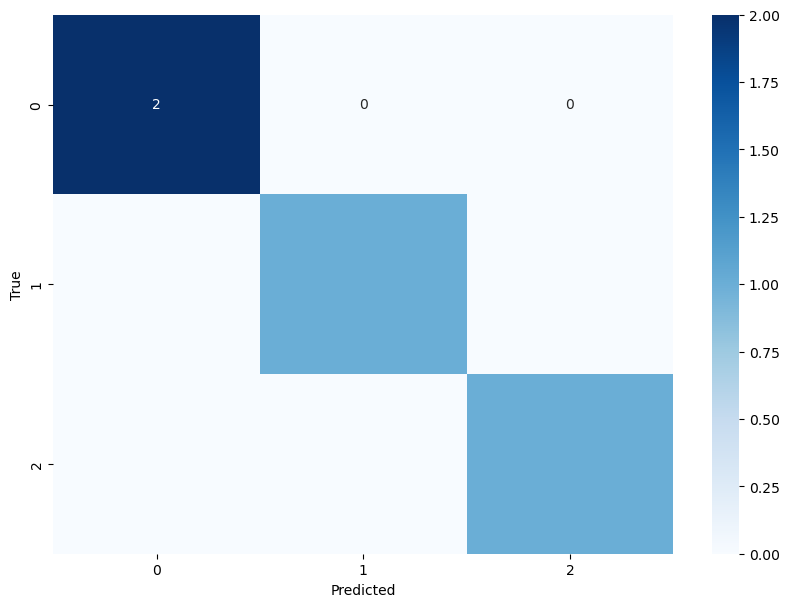

In [49]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 


In [50]:
#loading scikit random forest classifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#setting random seed
np.random.seed(0)

In [51]:
df['results'] = pd.Categorical(df['breast-quad'])
df.head()

,class,age,menopause,tumor-size,inv-nodes,node,deg,breast,breast-quad,irradiat,results
0,0,1,2,5,0,0,3,0,1,0,1
1,0,2,2,3,0,0,2,1,4,0,4
2,0,2,2,3,0,0,2,0,1,0,1
3,0,4,0,2,0,0,2,1,2,0,2
4,0,2,2,0,0,0,2,1,3,0,3


In [52]:
#creating train and test data 
df['is_train']= np.random.uniform(0, 1, len(df)) <=0.75
df.head()

,class,age,menopause,tumor-size,inv-nodes,node,deg,breast,breast-quad,irradiat,results,is_train
0,0,1,2,5,0,0,3,0,1,0,1,True
1,0,2,2,3,0,0,2,1,4,0,4,True
2,0,2,2,3,0,0,2,0,1,0,1,True
3,0,4,0,2,0,0,2,1,2,0,2,True
4,0,2,2,0,0,0,2,1,3,0,3,True


In [53]:
#creating dataframes with test rows and training rows
train,test = df[df['is_train']== True], df[df['is_train']==False]
print('Number of observation in the training data is:', len(train))
print('Number of observation in the test data is:', len(test))

Number of observation in the training data is: 221
Number of observation in the test data is: 65


In [54]:
#create a list of feature column's name
features = df.columns[:4]
#view features
print(features)

Index(['class', 'age', 'menopause', 'tumor-size'], dtype='object')


In [55]:
#converting each name into digits
y = pd.factorize(train['breast-quad'])[0]
print(y)

[0 1 0 2 3 0 0 2 0 1 2 0 0 0 2 2 0 0 0 2 0 2 2 2 4 4 0 0 0 4 2 1 2 0 2 1 0
 0 3 2 2 1 4 1 2 2 4 3 0 1 3 2 2 0 2 3 3 0 0 4 0 4 0 2 0 0 3 2 0 3 2 4 2 2
 2 0 3 2 2 0 0 0 3 0 2 2 1 1 0 2 2 2 2 3 0 1 0 0 4 1 2 2 2 1 2 2 1 0 4 1 0
 0 3 0 2 3 2 4 2 0 2 2 4 4 0 2 0 2 0 2 2 2 2 0 1 2 1 0 2 0 2 0 0 2 0 3 2 2
 2 3 2 0 2 2 2 0 4 0 0 0 0 0 1 4 0 1 1 4 1 2 0 2 2 4 1 3 0 0 2 1 2 2 2 0 2
 0 0 0 0 1 0 0 1 2 2 0 3 0 0 2 2 2 0 0 2 1 3 2 0 1 0 0 0 2 4 1 0 2 2 0 0]


In [56]:
#Creating a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state = 0)
#training the classifier
clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [57]:
#applying the trained classifier to the test
clf.predict(test[features])

array([2, 0, 3, 0, 4, 0, 0, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0,
       4, 2, 0, 0, 2, 2, 2, 1, 4, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       3, 0, 2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 2],
      dtype=int64)

In [58]:
X = df.drop('breast-quad', axis=1)  
y = df['breast-quad']
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [59]:
X

,class,age,menopause,tumor-size,inv-nodes,node,deg,breast,irradiat,results,is_train
0,0,1,2,5,0,0,3,0,0,1,True
1,0,2,2,3,0,0,2,1,0,4,True
2,0,2,2,3,0,0,2,0,0,1,True
3,0,4,0,2,0,0,2,1,0,2,True
4,0,2,2,0,0,0,2,1,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,2,0,0,2,False
282,1,1,2,3,0,0,3,0,1,2,True
283,1,4,0,3,0,0,1,1,0,2,True
284,1,2,0,5,4,0,3,0,0,1,True


In [60]:
y

0      1
1      4
2      1
3      2
4      3
      ..
281    2
282    2
283    2
284    1
285    1
Name: breast-quad, Length: 286, dtype: int32

In [61]:
y = y.astype(int)


In [62]:
y

0      1
1      4
2      1
3      2
4      3
      ..
281    2
282    2
283    2
284    1
285    1
Name: breast-quad, Length: 286, dtype: int32

In [63]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
y

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [ ]:
num_classes = y.shape[1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input


In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Assuming 'age' is the target column
X = df.drop(columns=['age'])
y = df['age']

print(X.shape, y.shape)


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Predictions:', y_pred.flatten())
print('True values:', y_test)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming X_test and y_test are your test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Print shapes and types for debugging
print(f"y_test shape: {y_test.shape}, y_test type: {type(y_test)}")
print(f"y_pred shape: {y_pred.shape}, y_pred type: {type(y_pred)}")

# Check if y_test is one-hot encoded and convert it to label encoding if necessary
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Print shapes and types after conversion for debugging
print(f"y_test shape after conversion: {y_test.shape}, y_test type after conversion: {type(y_test)}")

# Generate classification report
print(classification_report(y_test, y_pred))
